In [1]:
import modules.io as io
import modules.vessel_regression as vessel_regression
import numpy as np
import skimage.filters as filters
import skimage.feature as feature
import matplotlib.pyplot as plt

In [2]:
DATA_KEY    = "TEST"
CONFIG_FILE = "./config/split/rf_2_ct_aorta.yaml"

config      = io.load_yaml(CONFIG_FILE)

In [3]:
import factories.dataset_factory as dataset_factory

data    = dataset_factory.get(config, DATA_KEY)

177it [00:00, 4021.19it/s]
  4%|▍         | 7/177 [00:00<00:02, 63.72it/s]

centering images


 22%|██▏       | 39/177 [00:00<00:01, 93.17it/s]

outlier
outlier


100%|██████████| 177/177 [00:01<00:00, 114.49it/s]


In [4]:
X = data[0]
C = data[1]
N = X.shape[0]
print(X.shape)
print(C.shape)

(175, 128, 128)
(175, 15)


70


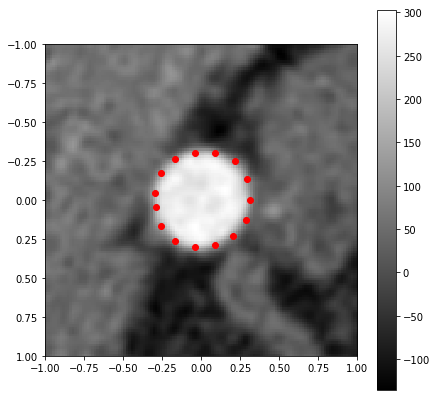

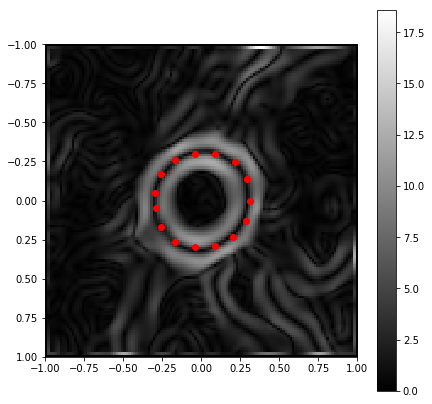

In [11]:
mid = int(X.shape[1]/2)
WIN = 60
OFF = (WIN*2.0/X.shape[1])

i = np.random.randint(N)
print(i)
x = X[i]
x_ = filters.gaussian(x, sigma=3)
x_ = filters.sobel(x_)
x_ = filters.sobel(x_)

xnorm = (1.0*x - np.mean(x))/(np.std(x)+1e-5)

c = C[i]

c = vessel_regression.pred_to_contour(c)

plt.figure(figsize=(7,7))
plt.imshow(x,cmap='gray', extent=[-1, 1, 1, -1])
plt.colorbar()
plt.scatter(c[:,0],c[:,1],color='r')
plt.show()

plt.figure(figsize=(7,7))
plt.imshow(x_,cmap='gray', extent=[-1, 1, 1, -1])
plt.colorbar()
plt.scatter(c[:,0],c[:,1],color='r')
plt.show()

In [16]:
mid = int(X.shape[1]/2)
WIN = 60
OFF = (WIN*2.0/X.shape[1])

for i in range(5000):
    x = X[i]

    xnorm  = (1.0*x - np.mean(x))/(np.std(x)+1e-5)

    xnorm_ = (1.0*x-x[mid,mid])/(np.std(x)+1e-5)
    c = C[i]

    c = vessel_regression.pred_to_contour(c)

    if np.amax(np.abs(c)) < 1:
        continue
    
    print(i)
    plt.figure(figsize=(7,7))
    plt.imshow(x,cmap='gray', extent=[-1, 1, 1, -1])
    plt.colorbar()
    plt.scatter(c[:,0],c[:,1],color='r')
    plt.show()